## Market Data Exploration

In this notebook, we demonstrate how we can fetch data from yahoo finance using 'data/fetch_data' utility and visualize the market prices. 
Specifically, we will:

    1. Fetch the data from yahoo finance
    2. Examine the raw data
    3. Plot the price series to understand trends, patterns, and relative movements
    


In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(root_dir)

from data.fetch_data  import download_stock_prices

In [5]:
## Define FAANG tickers and time window

tickers = ["META", "AMZN", "AAPL", "NFLX", "GOOGL"]
start_date = "2024-01-01"
end_date = dt.datetime.now().strftime("%Y-%m-%d")


### Fetch stock prices

In [6]:
prices = download_stock_prices(
            tickers,
            start_date,
            end_date)
print("Shape: ", prices.shape)
print("Columns: ", prices.columns.tolist())
print("Data :\n", prices.head())

Shape:  (433, 5)
Columns:  ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL']
Data :
 Ticker            META        AMZN        AAPL        NFLX       GOOGL
Date                                                                  
2024-01-02  344.168335  149.929993  184.081497  468.500000  137.223557
2024-01-03  342.359467  148.470001  182.703171  470.260010  137.968430
2024-01-04  344.993195  144.570007  180.382828  474.670013  135.455750
2024-01-05  349.793640  145.240005  179.658951  474.059998  134.800278
2024-01-08  356.462555  149.100006  184.002167  485.029999  137.888977


### Stock Prices Plot

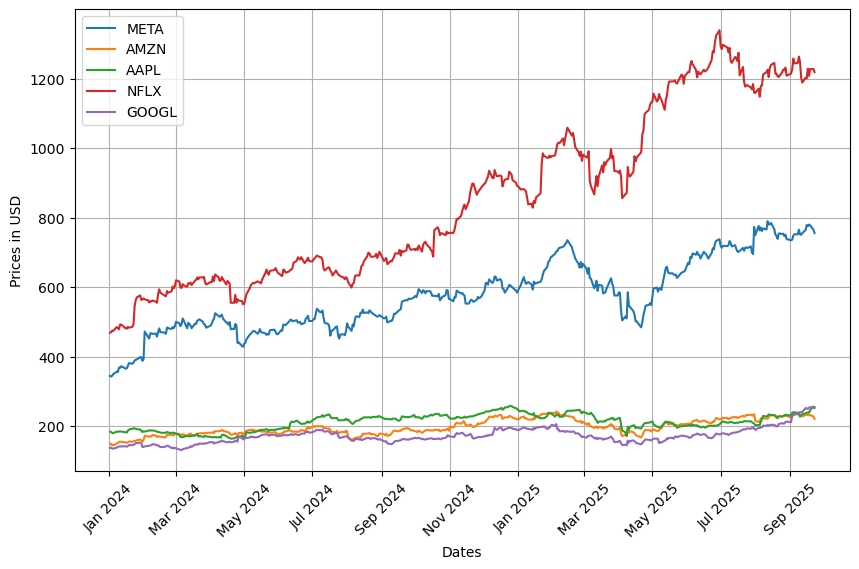

In [24]:

fig, ax = plt.subplots(figsize=(10,6))

for col in prices.columns:
    ax.plot(prices.index, prices[col], label=col)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.set_xlabel("Dates")
ax.set_ylabel("Prices in USD")
ax.grid()
ax.legend()
ax.tick_params(axis='x', labelrotation=45)

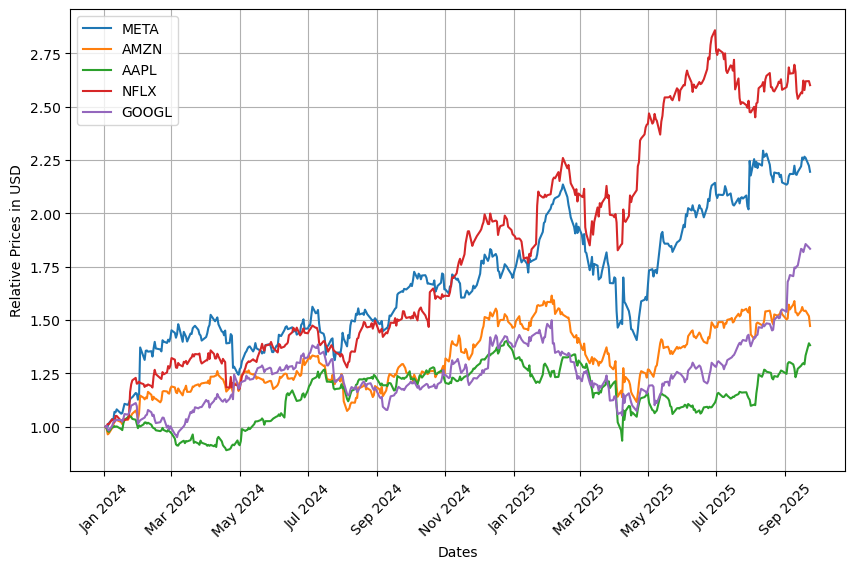

In [26]:
relative_growth = prices / prices.iloc[0]

fig, ax = plt.subplots(figsize=(10,6))

for col in relative_growth.columns:
    ax.plot(relative_growth.index, relative_growth[col], label=col)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.set_xlabel("Dates")
ax.set_ylabel("Relative Prices in USD")
ax.grid()
ax.legend()
ax.tick_params(axis='x', labelrotation=45)